In [1]:
# Math and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pre-processing libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [3]:
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [4]:
# Analysis libraries
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Dataset
df = pd.read_csv('bio-signal-smoking.csv')

# EDA

In [6]:
# Non relevant data
df.drop(columns=['ID', 'oral'], inplace=True)
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [7]:
df.shape

(55692, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [9]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

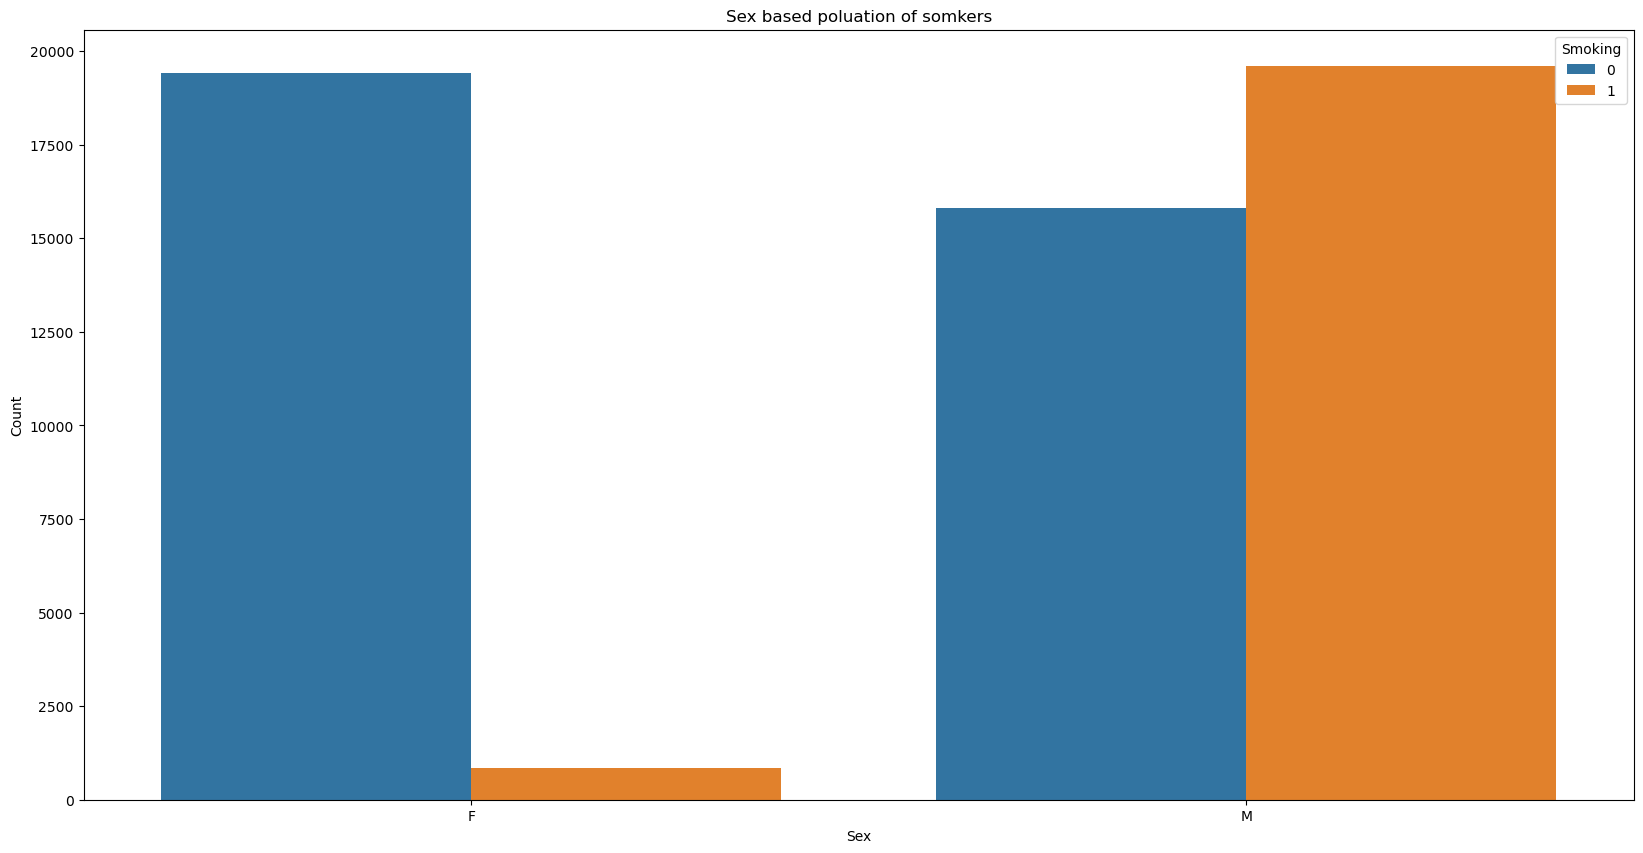

In [11]:
# Sex based poluation of somkers
plt.figure(figsize=(20,10))
sns.countplot(x='gender', hue='smoking', data=df)

plt.title('Sex based poluation of somkers')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.legend(title='Smoking', loc='upper right')
plt.show()

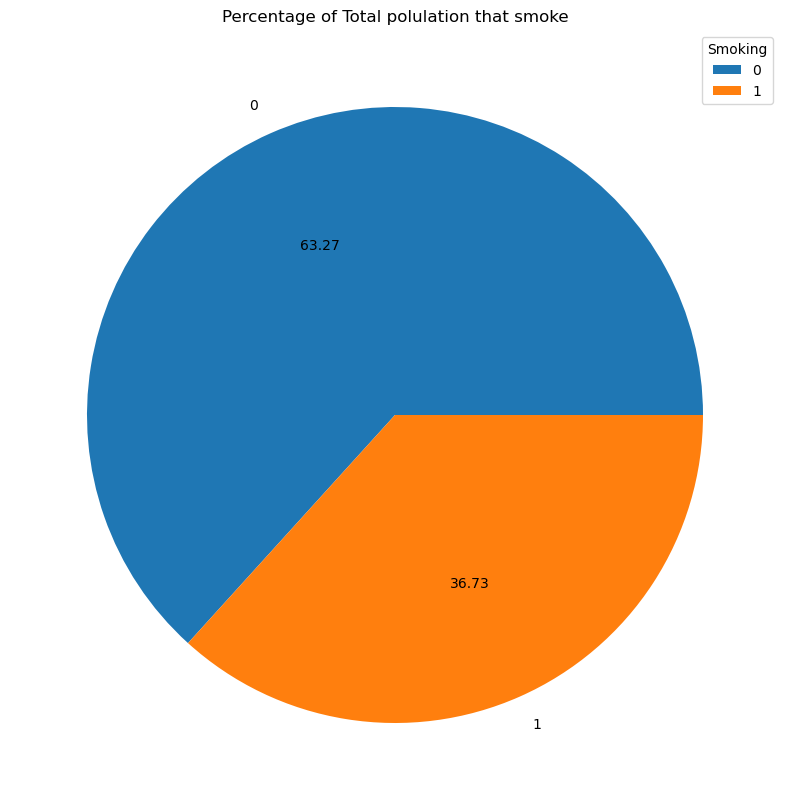

In [12]:
# Percentage of Total polulation that smoke
plt.figure(figsize=(20,10))
df['smoking'].value_counts().plot.pie(autopct='%0.2f')

plt.title('Percentage of Total polulation that smoke')
plt.ylabel('')

plt.legend(title='Smoking', loc='upper right')
plt.show()

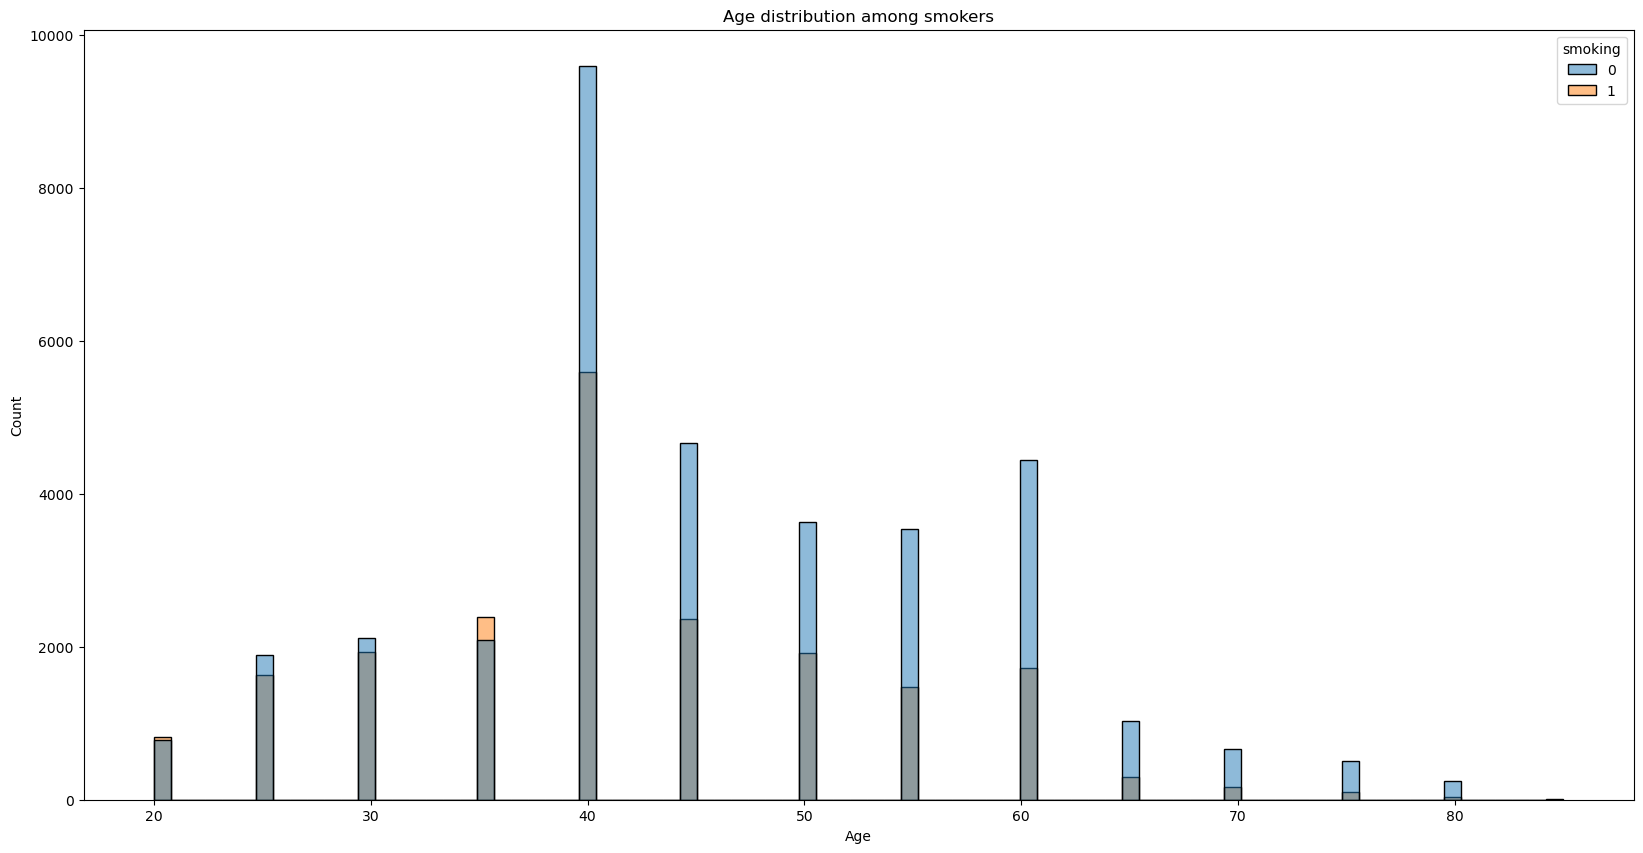

In [13]:
# Age distribution among smokers
plt.figure(figsize=(20,10))
sns.histplot(x=df['age'], hue=df['smoking'])

plt.title('Age distribution among smokers')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

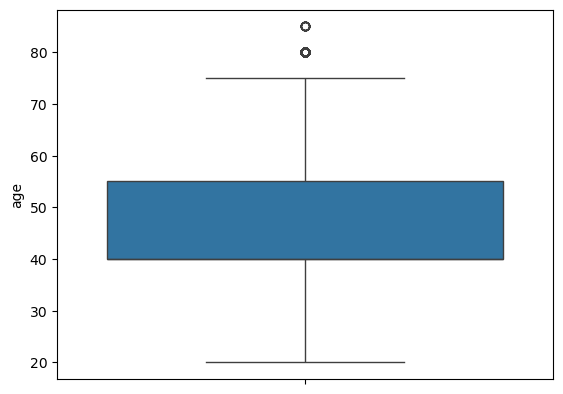

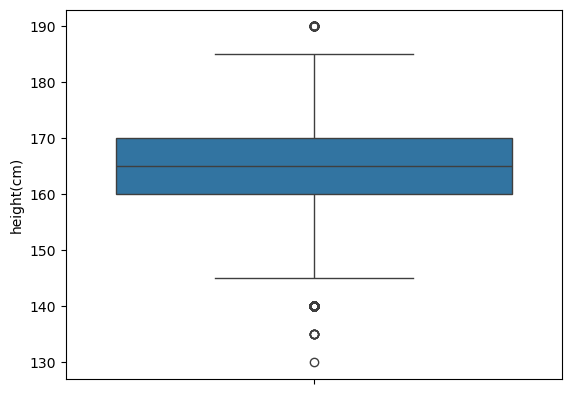

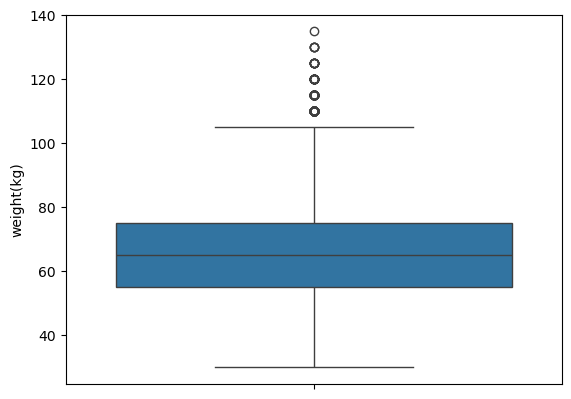

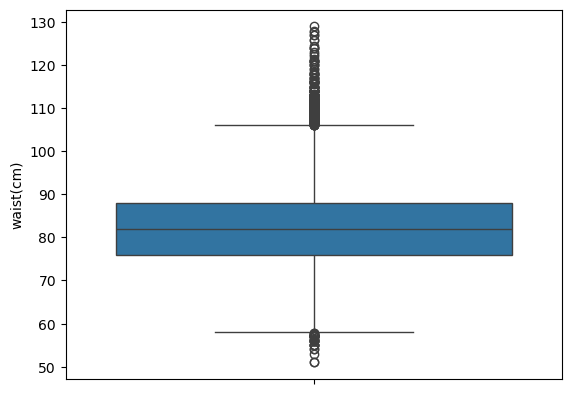

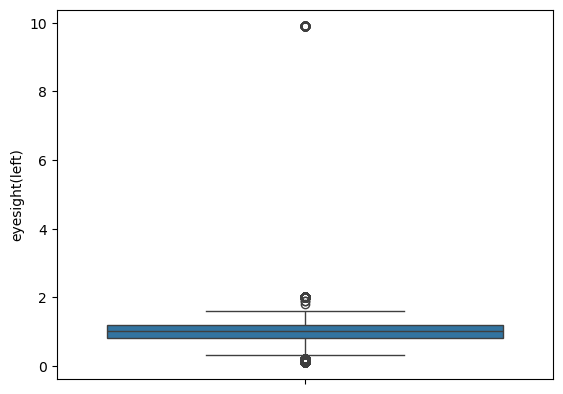

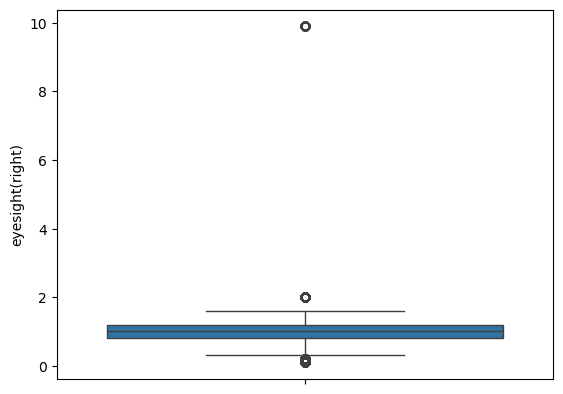

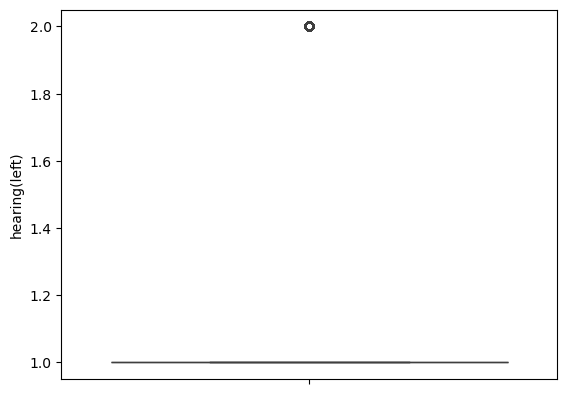

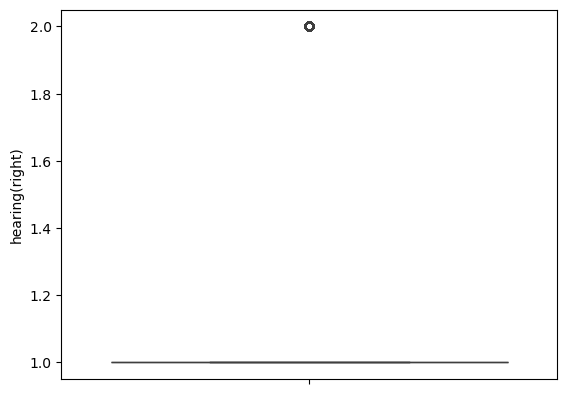

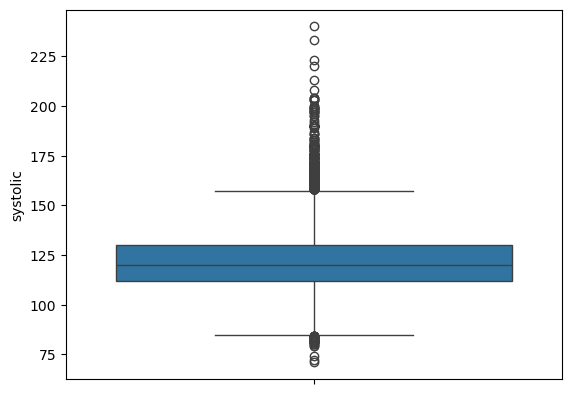

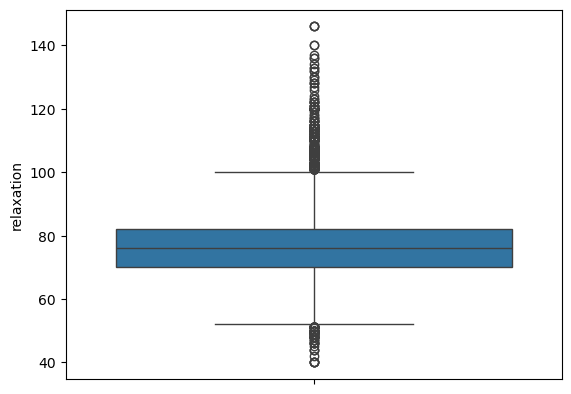

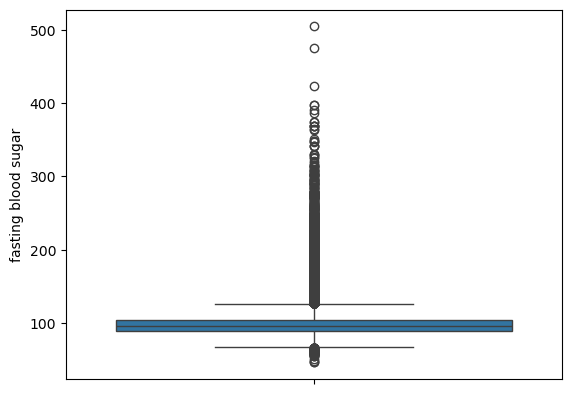

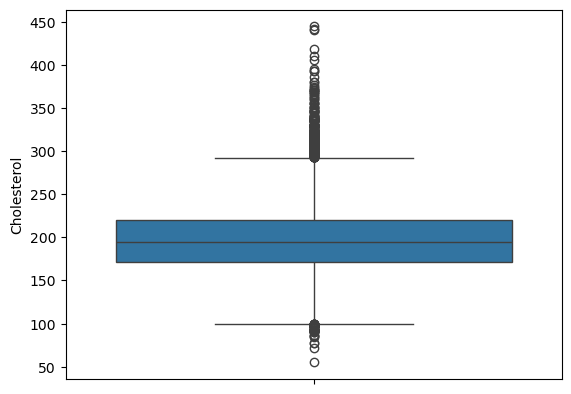

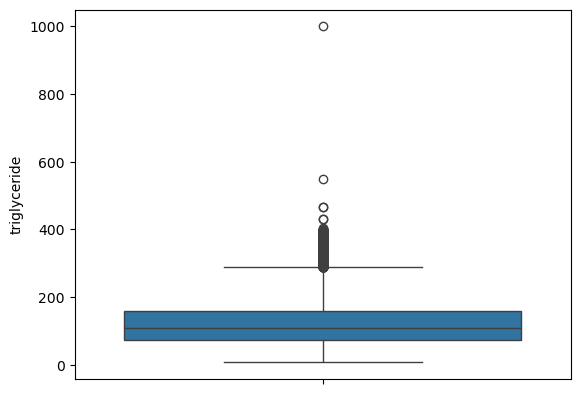

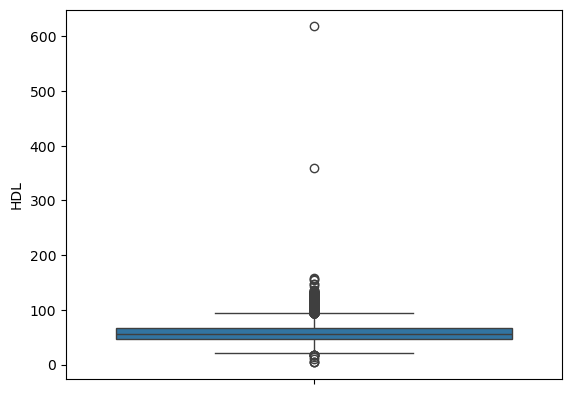

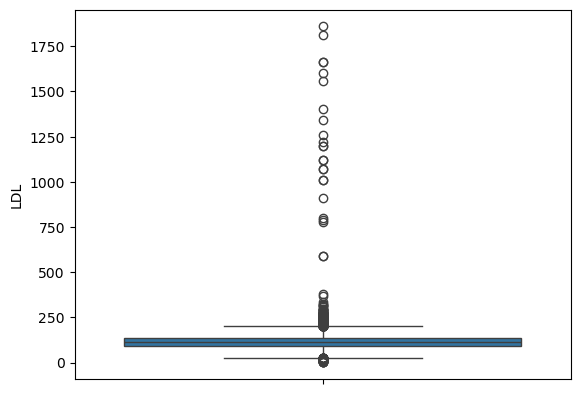

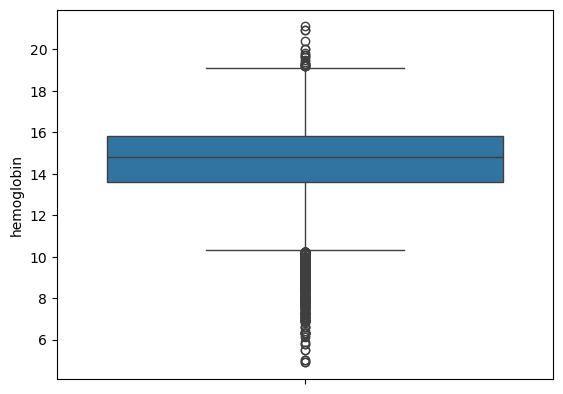

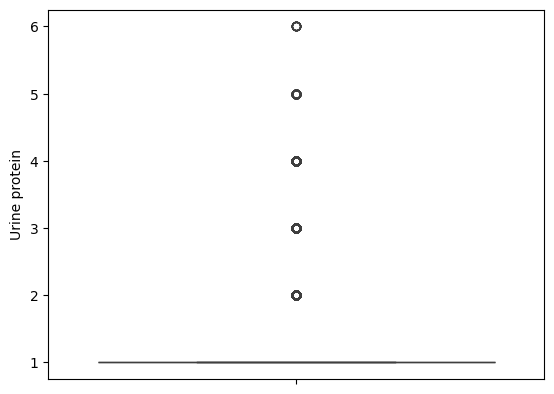

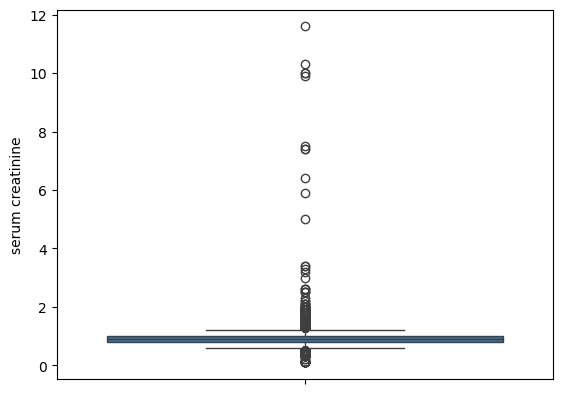

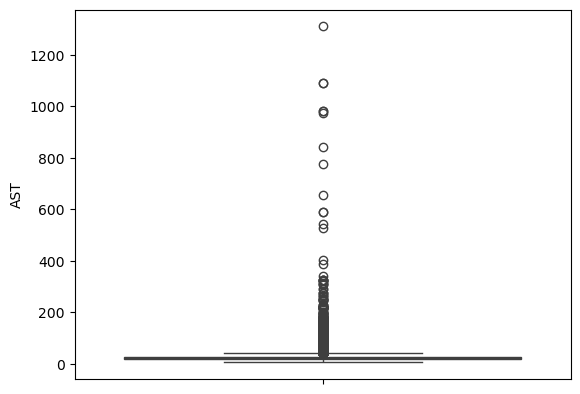

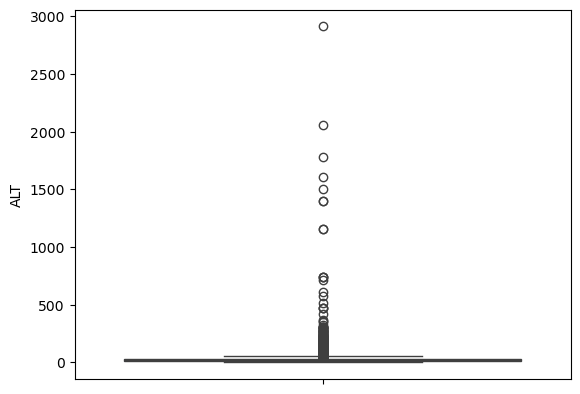

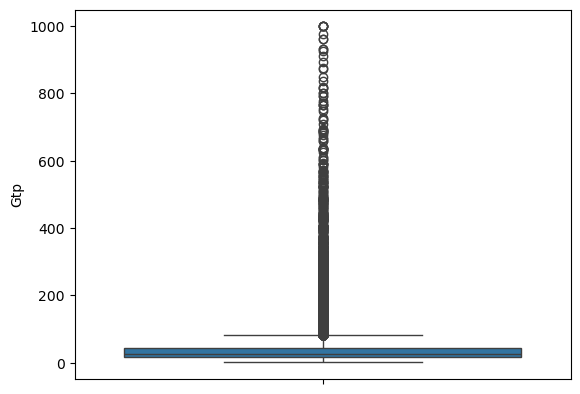

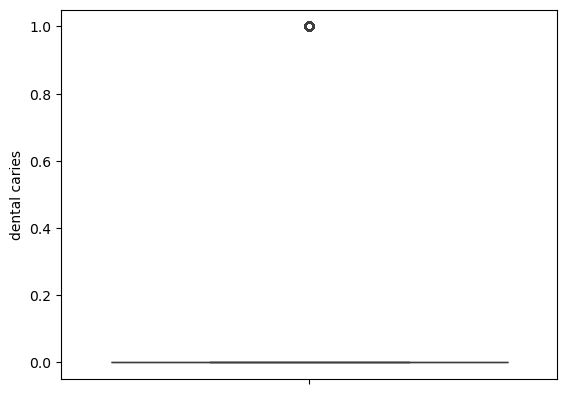

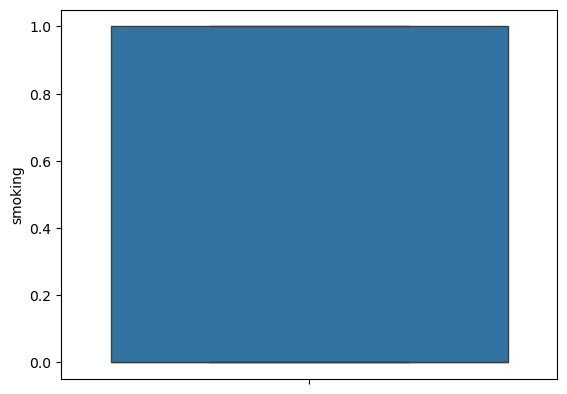

In [14]:
# Outlier detection

for i in df.columns:
    if (df[i].dtypes=='int64') or (df[i].dtypes=='float64'):
        sns.boxplot(df[i])
        plt.show()

# Pre-processing

In [15]:
# Label encoding
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['tartar'] = le.fit_transform(df['tartar'])
df['dental caries'] = le.fit_transform(df['dental caries'])

In [16]:
# Feature selection
X = df.iloc[:, :-1]
y = df['smoking']

etc = ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier()

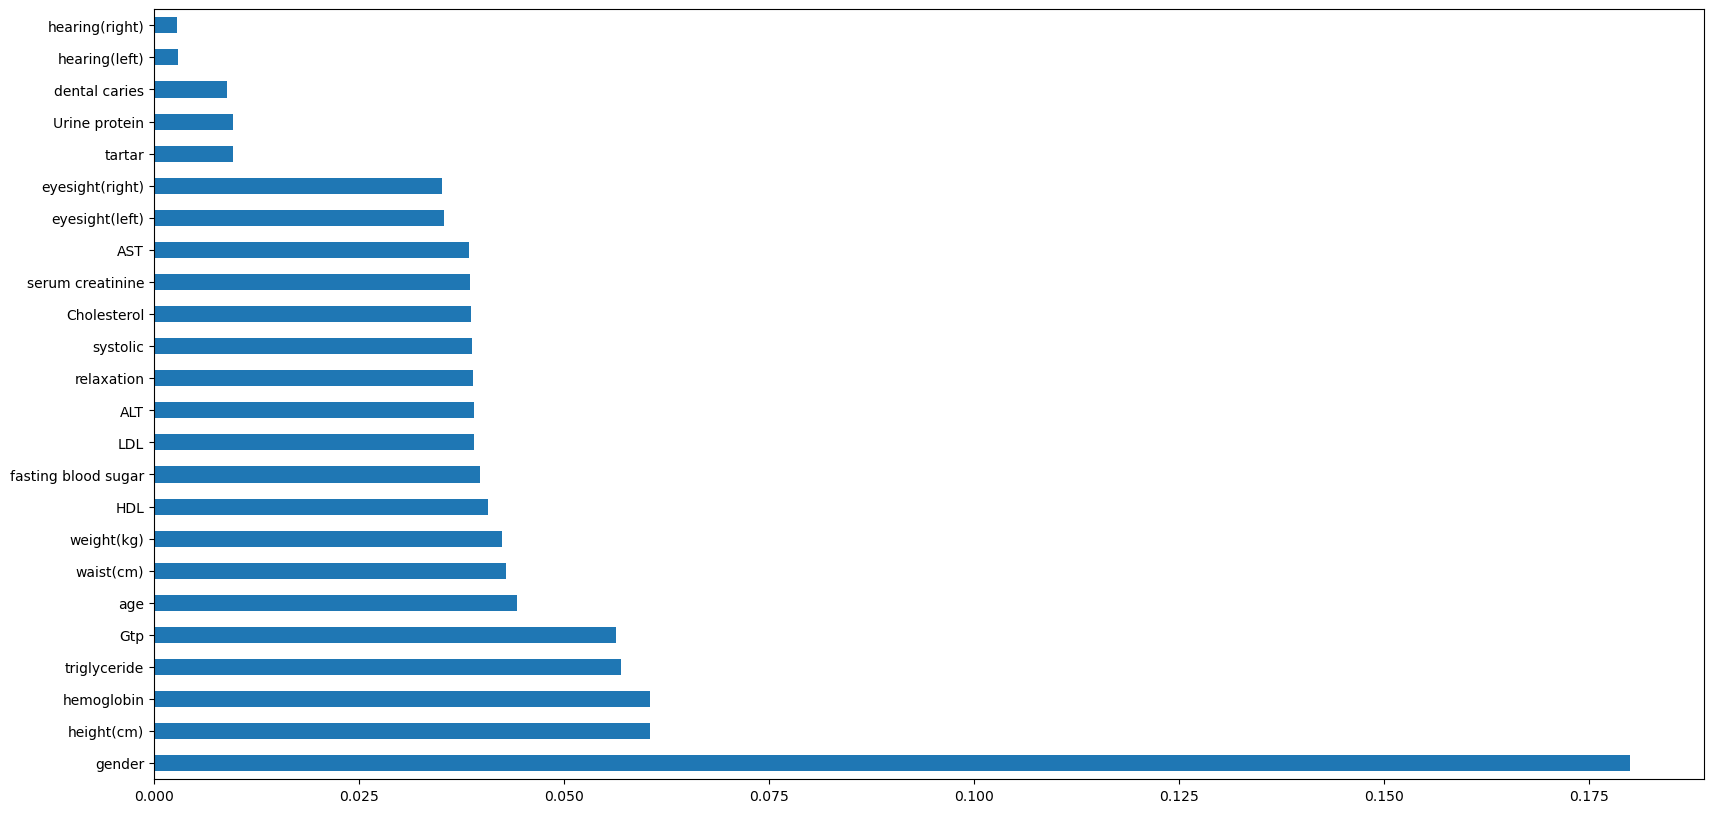

In [17]:
# Plotting 24 of the most important features
df_1 = pd.Series(etc.feature_importances_, index=X.columns)
plt.figure(figsize=(20,10))
df_1.nlargest(24).plot(kind='barh')
plt.show()

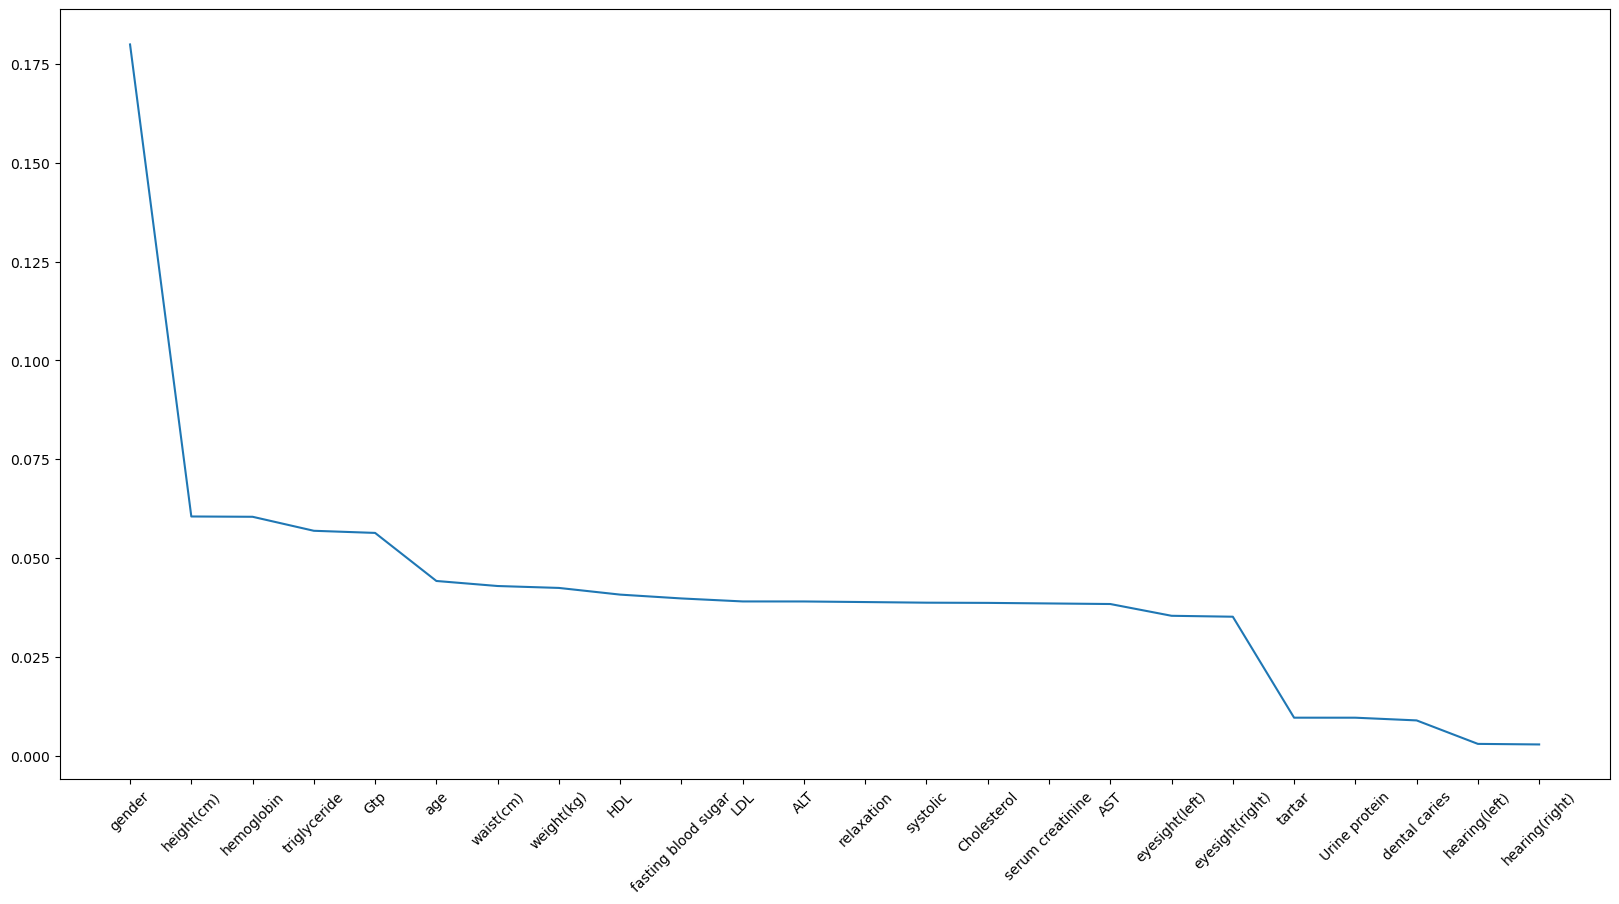

In [18]:
plt.figure(figsize=(20,10))
grouped = df_1.nlargest(24)
sns.lineplot(data=grouped)
plt.xticks(rotation=45)
plt.show()

Since the top 19 features are the most impactful, we will use them for our ML models

In [19]:
df_1.nlargest(19)

gender                 0.179957
height(cm)             0.060522
hemoglobin             0.060447
triglyceride           0.056903
Gtp                    0.056363
age                    0.044205
waist(cm)              0.042928
weight(kg)             0.042443
HDL                    0.040751
fasting blood sugar    0.039782
LDL                    0.039026
ALT                    0.039018
relaxation             0.038869
systolic               0.038712
Cholesterol            0.038660
serum creatinine       0.038517
AST                    0.038372
eyesight(left)         0.035396
eyesight(right)        0.035161
dtype: float64

In [20]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [21]:
# Target and Features split

X = df[['gender', 
        'hemoglobin', 
        'height(cm)', 
        'triglyceride', 
        'Gtp', 
        'age', 
        'waist(cm)', 
        'weight(kg)', 
        'HDL', 
        'LDL', 
        'ALT', 
        'fasting blood sugar', 
        'relaxation', 
        'systolic', 
        'Cholesterol', 
        'serum creatinine', 
        'AST', 
        'eyesight(right)', 
        'eyesight(left)']]

y = df['smoking']

In [22]:
# Splitting into Testing and Training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [24]:
# Fitting into lr model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0, 0, 1, ..., 0, 0, 1])

# Decision Tree

In [26]:
# Fitting into dt model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 1, ..., 0, 0, 1])

# Bagging Classifier

In [28]:
# Fitting into bagging_clf model
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=1000
)

bagging_clf.fit(X_train, y_train).score(X_test, y_test)

0.8287997127210701

In [29]:
# Predictions
y_pred_bagging_clf = bagging_clf.predict(X_test)
y_pred_bagging_clf

array([0, 0, 1, ..., 0, 0, 1])

# Extra Tress Classifier

In [30]:
# Fitting into et model
et = ExtraTreesClassifier(
    n_estimators=1000,
    random_state= 42
)

et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=1000, random_state=42)

In [31]:
# Predictions
y_pred_et = et.predict(X_test)
y_pred_et

array([0, 0, 1, ..., 0, 0, 1])

# Random Forest Classifier

In [32]:
# Fitting into rfc model
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [33]:
# Predictions
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 0, 1, ..., 0, 0, 1])

# Analyzing the models

In [34]:
# Accuracy scores
accuracy = pd.DataFrame({
    'Model': ['Logistic Regression (lr)', 
              'Decision Tree (dt)', 
              'Bagging Classifier (bagging_clf)', 
              'Extra Trees Classifier (et)', 
              'Random Forest Classifier (rfc)'],
              
    'Accuracy score': [accuracy_score(y_test, y_pred_lr), 
                       accuracy_score(y_test, y_pred_dt), 
                       accuracy_score(y_test, y_pred_bagging_clf), 
                       accuracy_score(y_test, y_pred_et), 
                       accuracy_score(y_test, y_pred_rfc)]
})

accuracy

,Model,Accuracy score
0,Logistic Regression (lr),0.736422
1,Decision Tree (dt),0.783015
2,Bagging Classifier (bagging_clf),0.828800
3,Extra Trees Classifier (et),0.831673
4,Random Forest Classifier (rfc),0.831852


In [35]:
# lr model
print(f'Accuracy score: {accuracy_score(y_test, y_pred_lr)}')
print(f'\nClassification report: \n{classification_report(y_test, y_pred_lr)}')

Accuracy score: 0.7364215818296077

Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      7027
           1       0.63      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [36]:
# dt model
print(f'Accuracy score: {accuracy_score(y_test, y_pred_dt)}')
print(f'\nClassification report: \n{classification_report(y_test, y_pred_dt)}')

Accuracy score: 0.783014633270491

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7027
           1       0.70      0.71      0.71      4112

    accuracy                           0.78     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



In [37]:
# bagging_clf model
print(f'Accuracy score: {accuracy_score(y_test, y_pred_bagging_clf)}')
print(f'\nClassification report: \n{classification_report(y_test, y_pred_bagging_clf)}')

Accuracy score: 0.8287997127210701

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.80      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



In [38]:
# et model
print(f'Accuracy score: {accuracy_score(y_test, y_pred_et)}')
print(f'\nClassification report: \n{classification_report(y_test, y_pred_et)}')

Accuracy score: 0.8316725020199299

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7027
           1       0.75      0.82      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.84      0.83      0.83     11139



In [39]:
# rfc model
print(f'Accuracy score: {accuracy_score(y_test, y_pred_rfc)}')
print(f'\nClassification report: \n{classification_report(y_test, y_pred_rfc)}')

Accuracy score: 0.8318520513511087

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.76      0.81      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139

